## $\color{red}{\text{Lecture Overview}}$
1. **Dimensionality reduction**
2. **Principal components analysis**

## $\color{red}{\text{Dimensionality reduction}}$

1. The **curse of dimensionality** arises when data analysis and modeling may be adversely affected by the explosion of data
2. The curse of dimensionality has the following negative effects
  - Datasets may have hundreds or thousands of variables
  - It may be computationally expensive to analyze the data
  - Some variables may capture noise
  - Some independent variables may be irrelevant to the dependent variable
3. **Dimensionality reduction** refers to the process of curbing the effects of the curse of dimensionality
  - We use statistical and heuristic methods to obtain a subset of variables that may explain the phenomena
  - We can also use dimensionality reduction techniques to visualize the data

## $\color{red}{\text{Principal components analysis (PCA)}}$

1. PCA reduces a set high-dimensional variables to a lower-dimensional set of variables called **principal components**
2. **Principal components** are linear combination of the original variables and are uncorrelated with each other
3. Initial principal components capture most variation in the data
4. The **loadings** of each variable in the principal component may give an indication of its importance
4. PCA is also used to visualize high-dimensional datasets

### $\color{blue}{\text{Advantages of PCA}}$

- Principal components are uncorrelated
- PCA has many applications, making it very versatile

### $\color{blue}{\text{Disadvantages of PCA}}$

1. Does not seek to understand variable scales or distribution
2. It is affected by variable scales or units
  - Variables should be transformed
  - Variables should be standardized or normalized before PCA

## $\color{red}{\text{Import Required Packages}}$

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from kneed import KneeLocator

## $\color{red}{\text{Import Data}}$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DS4510/Data
housingData= pd.read_excel('housingData.xlsx', sheet_name='housingData')

/content/drive/MyDrive/DS4510/Data


## $\color{red}{\text{Analytic task}}$
1. Using the housing data, reduce the dimensions using PCA
2. Obtain variables coming out of the PCA

## $\color{red}{\text{Data transformation}}$


### $\color{blue}{\text{Standardization}}$

In [ ]:
#Compute age of building
currernt_year = pd.Timestamp.now().year
#currernt_year

housingData['building_age'] = currernt_year - housingData["yr_built"]
housingData.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,building_age
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0,70
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0,74
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0,92
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0,60
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0,38


In [ ]:
from sklearn.preprocessing import StandardScaler

#Drop the following variables from the data
drop_vars = ['id', 'date', 'zipcode', 'yr_renovated']
new_housing = housingData.drop(drop_vars, axis=1)

new_housing.head()

#Standardize the data
scaler = StandardScaler()
standardize_data = scaler.fit_transform(new_housing)
#standardize_data #Pass through to the principal component analysis

### $\color{blue}{\text{Component selection - explained variance approach}}$
1. The **explained variance** approach determines the number of principal components needed to retain a chosen percentage (e.g., 95%) of the total variance in the dataset

2. It ensures that enough components are selected to preserve most of the original data's information while reducing dimensionality.


#### $\color{green}{\text{Advantages and disadvantages}}$
1. **Advantages**
  - Provides a quantitative and objective method for component selection, ensuring minimal information loss
2. **Disadvantages**
  - The threshold (e.g., 95%) is arbitrary and may lead to either too many or too few components being retained.

Text(0.5, 1.0, 'Cumlative explained variance vs number of principle components')

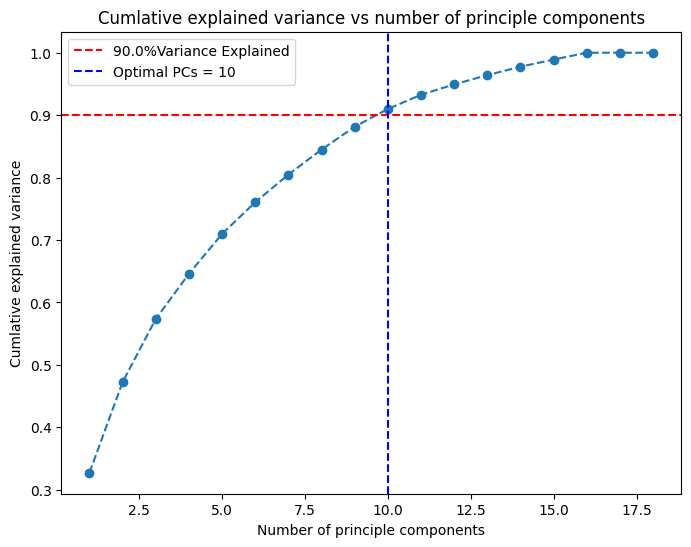

In [ ]:
from sklearn.decomposition import PCA
#Apply PCA without specifying the number of components
pca = PCA()
pca.fit(standardize_data)

#Compute explained variance
explained_variance = pca.explained_variance_ratio_
cumlative_variance = np.cumsum(explained_variance)
#explained_variance
cumlative_variance


#Find number of components that explains at least some threshold of variance
threshold = 0.9
n_components_thresh = np.argmax(cumlative_variance >= threshold) + 1
n_components_thresh

#Plot cumlative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1,len(cumlative_variance)+1), cumlative_variance, marker='o', linestyle="--")
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}%Variance Explained')
plt.axvline(x=n_components_thresh, color='b', linestyle='--', label=f'Optimal PCs = {n_components_thresh}')
plt.xlabel("Number of principle components")
plt.ylabel("Cumlative explained variance")
plt.legend()
plt.title("Cumlative explained variance vs number of principle components")
#new_housing

txt

### $\color{blue}{\text{Component selection - the scree plot}}$
1. The **scree plot** visualizes the explained variance of each principal component, helping identify the optimal number of components to retain in PCA.

2. It allows for **elbow detection**, where the variance gain diminishes, indicating an ideal cutoff point for dimensionality reduction.

#### $\color{green}{\text{Advantages and disadvantages}}$
1. **Advantages**
  - Simple to interpret, provides a visual way to determine how many components to keep
2. **Disadvantages**
  - The "elbow" point is subjective and may not always be clearly defined

## $\color{red}{\text{Applying PCA}}$

In [ ]:
# Conduct PCA using optimal number of components
pca = PCA(n_components=n_components_thresh)
housing_pca = pca.fit_transform(standardize_data)
#housing_pca

# Convert PCA results to dataframe
housing_pca_df = pd.DataFrame(housing_pca, columns=[f'PC{i+1}' for i in range(housing_pca.shape[1])])
housing_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.590485,0.521956,0.065691,0.260297,-0.000669,-0.004628,-0.068394,-0.913053,-0.001765,-0.136675
1,-0.219899,-0.537808,-0.802202,0.093009,1.388658,0.355769,-0.731793,-0.157096,0.394878,0.014963
2,-3.143340,-0.258655,0.217747,0.548838,1.463810,0.183012,1.195348,-1.194876,-0.251553,0.069834
3,-0.981825,-1.770370,-0.364457,-1.478900,-1.451553,0.257667,-0.533275,2.150449,0.201299,-0.365180
4,-0.177833,1.170860,0.041098,0.125992,0.196158,0.290118,1.401464,-0.459568,0.124810,-0.071177


### $\color{blue}{\text{Finding influential variables}}$

1. Compute the absolute **loadings** for each variable in the PCs
  - **Loadings** are the coefficients (weights) that show how much each original variable contributes to a principal component (PC)
  - The larger the absolute loadings, the more influence the variable has on the PC
2. Select variables with consistently high loadings across multiple
3. Set some selection criteria
  - For us, a variable is important if the absolute value of its loading exceeds the median load across all PCS

In [ ]:
# Display the loadings of each variable in each PC
var_names = new_housing.columns
housing_loadings = pd.DataFrame(pca.components_.T, index=var_names, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
housing_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
bedrooms,0.221485,-0.132143,-0.054843,-0.395233,-0.203031,-0.057784,-0.254292,-0.157912,0.566679,0.314166
bathrooms,0.345922,-0.015171,-0.097474,-0.106279,-0.096592,0.096801,-0.153368,0.174472,0.086436,0.025689
sqft_living,0.371030,-0.178741,0.009493,-0.140508,-0.033545,-0.012158,-0.038643,-0.093709,-0.029316,-0.119255
sqft_lot,0.085645,0.005503,0.631127,0.038859,0.168044,0.142695,-0.201054,0.105512,0.047417,0.011815
floors,0.231169,0.219150,-0.198635,0.170764,0.231124,-0.183767,-0.384808,0.259221,0.082106,0.240592


In [ ]:
# Compute absolute loadings
abs_loadings = np.abs(pca.components_)

# compute median loading across all PCs
median_loadings =  np.median(abs_loadings)

# identify important variables (those loadings that exceed the median loading)
important_vars = np.any(abs_loadings > median_loadings, axis=0)

# extract var names
important_features = np.array(var_names)[important_vars]
important_features

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price', 'building_age'], dtype=object)

In [ ]:
len(important_features) + len(drop_vars)

22